In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from dotenv import load_dotenv
from GcopterFormatter import GcopterFormatter
from RmaderFormatter import RmaderFormatter
import re
load_dotenv()


True

In [2]:
# please create a .env file with PREFIXPATH=your_path_to_GcopterRmaderIntegration_
gcopterlogs = os.listdir(os.path.join(str(os.getenv("PREFIXPATH")), "benchmarkingLogs/cpulogs/gcoptercpulogs"))
rmaderlogs = os.listdir(os.path.join(str(os.getenv("PREFIXPATH")), "benchmarkingLogs/cpulogs/rmadercpulogs"))

# print(gcopterlogs)
# print(rmaderlogs)

# for file in rmaderlogs:
#     print(re.findall(r'[0-9]+', file))

gcopterlogs = sorted(gcopterlogs, key=lambda x:int(re.findall(r'[0-9]+', x)[1])) # sort before pushing to dataframe
rmaderlogs = sorted(rmaderlogs, key=lambda x:int(re.findall(r'[0-9]+', x)[2])) # sort before pushing to dataframe

print(gcopterlogs)
print(rmaderlogs)

['gcopter_16_5.txt', 'gcopter_16_40.txt', 'gcopter_16_60.txt', 'gcopter_16_70.txt', 'gcopter_16_80.txt', 'gcopter_16_90.txt', 'gcopter_16_100.txt']
['rmader_0.01_5_0.1.txt', 'rmader_0.01_40_0.1.txt', 'rmader_0.01_60_0.1.txt', 'rmader_0.01_70_0.1.txt', 'rmader_0.01_80_0.1.txt', 'rmader_0.01_90_0.1.txt', 'rmader_0.01_100_0.1.txt']


In [3]:
gf = GcopterFormatter(os.path.join(str(os.getenv('PREFIXPATH')), "DOESNTMATTER,JUSTFORINIT"))

gcopterdict = {}
gcopterdict_noOutlier = {}

path = os.path.join(str(os.getenv('PREFIXPATH')), "benchmarkingLogs/cpulogs/gcoptercpulogs/")

for file in gcopterlogs:
    gf.changeFilePath(path+file)
    gcopterdict["cpu="+re.findall(r'[0-9]+', file)[1]] = gf.format()
    gcopterdict_noOutlier["cpu="+re.findall(r'[0-9]+', file)[1]] = gf.removeOutliers()

# print(gcopterdict)
    


gcopterdf = pd.DataFrame(gcopterdict)
gcopterdf_noOutlier = pd.DataFrame(gcopterdict_noOutlier)
print(gcopterdf.describe())

           cpu=5     cpu=40     cpu=60     cpu=70     cpu=80     cpu=90  \
count  51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean   26.679641  31.457927  30.680692  31.580227  35.508516  37.979029   
std     7.105448  11.184256   7.782535   7.798222  11.504901  15.456631   
min    17.786300  17.153900  18.113300  20.319500  23.118400  16.532100   
25%    22.030850  25.536950  24.865050  25.462600  28.811300  28.721950   
50%    24.611200  29.457500  29.239600  29.426400  32.413900  32.708200   
75%    28.949950  34.171400  35.368600  37.439550  37.889750  43.948600   
max    56.444100  88.419200  54.326400  54.660300  81.030700  97.602200   

          cpu=100  
count   51.000000  
mean    39.606478  
std     16.008362  
min     18.961400  
25%     29.084250  
50%     34.259200  
75%     43.103000  
max    103.768000  


In [17]:
rf = RmaderFormatter(os.path.join(str(os.getenv('PREFIXPATH')), "DOESNTMATTER,JUSTFORINIT"))

rmaderdict = {}
rmaderdict_noOutlier = {}

path = os.path.join(str(os.getenv('PREFIXPATH')), "benchmarkingLogs/cpulogs/rmadercpulogs/")

for file in rmaderlogs:
    rf.changeFilePath(path+file)
    rmaderdict["cpu="+re.findall(r'[0-9]+', file)[2]] = [rf.success()]*2 #quick hack so pandas doesnt complain
    # rmaderdict_noOutlier["cpu="+re.findall(r'[0-9]+', file)[2]] = rf.removeOutliers()

# print(gcopterdict)

print(rmaderdict)
    


rmaderdf = pd.DataFrame(rmaderdict)
rmaderdf_noOutlier = pd.DataFrame(rmaderdict_noOutlier)
print(rmaderdf.describe())

{'cpu=5': [100.0, 100.0], 'cpu=40': [100.0, 100.0], 'cpu=60': [98.07692307692307, 98.07692307692307], 'cpu=70': [51.92307692307693, 51.92307692307693], 'cpu=80': [55.769230769230774, 55.769230769230774], 'cpu=90': [30.76923076923077, 30.76923076923077], 'cpu=100': [1.9230769230769231, 1.9230769230769231]}
       cpu=5  cpu=40     cpu=60     cpu=70     cpu=80     cpu=90   cpu=100
count    2.0     2.0   2.000000   2.000000   2.000000   2.000000  2.000000
mean   100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077
std      0.0     0.0   0.000000   0.000000   0.000000   0.000000  0.000000
min    100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077
25%    100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077
50%    100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077
75%    100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077
max    100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077


In [9]:
gcopterdf_noOutlier

,cpu=5,cpu=40,cpu=60,cpu=70,cpu=80,cpu=90,cpu=100
0,21.814200,42.219100,26.452500,24.821600,51.018800,49.745500,57.743200
1,19.785000,28.969100,40.564500,23.609900,34.303400,28.705900,32.215500
2,25.743300,17.153900,22.985300,20.319500,32.557200,32.708200,39.031600
3,22.217300,23.796300,23.899000,40.765500,33.595400,29.344300,27.041900
4,29.337500,32.409600,35.515000,31.575300,25.413400,24.080500,38.151900
5,21.975900,24.372200,27.063700,25.876500,31.519200,25.752800,26.815200
6,22.267700,29.648900,21.274800,20.801000,31.066600,30.407000,27.962400
7,24.010300,25.391600,25.535400,22.631400,38.758900,40.690700,28.409500
8,29.571600,34.211000,31.852000,30.071100,30.278900,33.857700,31.015800
9,20.519600,32.892300,30.274200,32.182900,37.020600,29.581200,28.986100


r^2 = [[1.         0.95983358]
 [0.95983358 1.        ]]
0.11318921411719637 24.06629666425669


(0.0, 40.0)

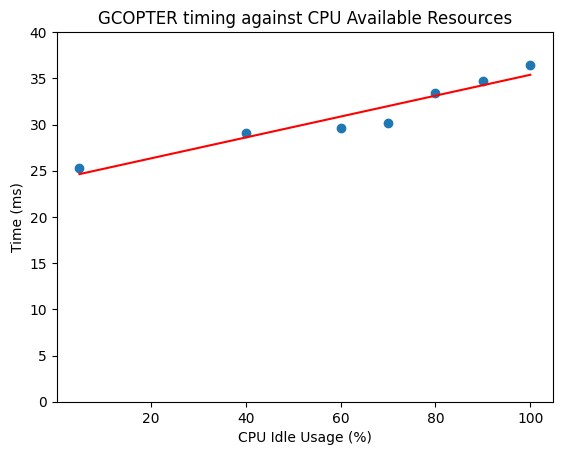

In [40]:
gcopter_x = []
gcopter_y = []

for col in gcopterdf_noOutlier:
    gcopter_x.append(int(col[4::]))
    gcopter_y.append(gcopterdf_noOutlier[col].mean())

gcopter_x = np.array(gcopter_x)
gcopter_y = np.array(gcopter_y)

a,b = np.polyfit(gcopter_x, gcopter_y, 1)
rho = np.corrcoef(gcopter_x, gcopter_y)
print(f'r^2 = {rho}')
print(a, b)


# print(gcopter_x)
# print(gcopter_y)
fig, ax = plt.subplots()
ax.scatter(gcopter_x, gcopter_y)
ax.plot(gcopter_x, (a*gcopter_x+b), color="red")
ax.set_xlabel("CPU Idle Usage (%)")
ax.set_ylabel("Time (ms)")
ax.set_title("GCOPTER timing against CPU Available Resources")
plt.ylim([0,40])

r^2 = [[ 1.         -0.97671775]
 [-0.97671775  1.        ]]
-0.00012365470953937415 0.040277970687480846


(0.0, 120.0)

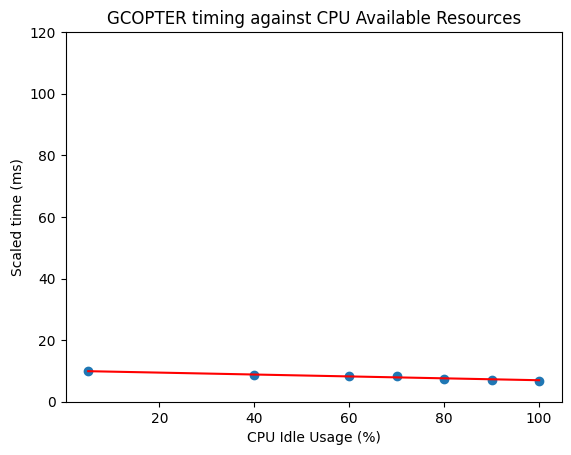

In [36]:
gcopter_x = []
gcopter_y = []

for col in gcopterdf_noOutlier:
    gcopter_x.append(int(col[4::]))
    gcopter_y.append(1/gcopterdf_noOutlier[col].mean())

gcopter_x = np.array(gcopter_x)
gcopter_y = np.array(gcopter_y)

a,b = np.polyfit(gcopter_x, gcopter_y, 1)
rho = np.corrcoef(gcopter_x, gcopter_y)
print(f'r^2 = {rho}')
print(a, b)


# print(gcopter_x)
# print(gcopter_y)
fig, ax = plt.subplots()
ax.scatter(gcopter_x, 250*gcopter_y)
ax.plot(gcopter_x, 250*(a*gcopter_x+b), color="red")
ax.set_xlabel("CPU Idle Usage (%)")
ax.set_ylabel("Scaled time (ms)")
ax.set_title("GCOPTER timing against CPU Available Resources")
plt.ylim([0,120])

   cpu=5  cpu=40     cpu=60     cpu=70     cpu=80     cpu=90   cpu=100
0  100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077
1  100.0   100.0  98.076923  51.923077  55.769231  30.769231  1.923077
[5, 40, 60, 70, 80, 90, 100]
[100.0, 100.0, 98.07692307692307, 51.92307692307693, 55.769230769230774, 30.76923076923077, 1.9230769230769231]
-1.0150897580435339 127.1680686844158


(0.0, 120.0)

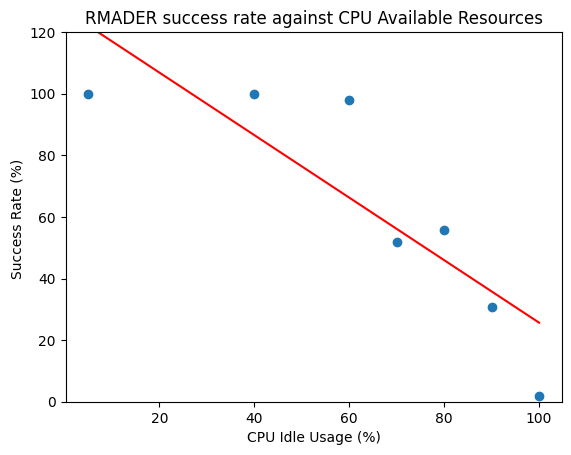

In [29]:
rmader_x = []
rmader_y = []
print(rmaderdf)
for col in rmaderdf:
    rmader_x.append(int(col[4::]))
    rmader_y.append(rmaderdf[col].mean())
print(rmader_x)
print(rmader_y)
rmader_x = np.array(rmader_x)
rmader_y = np.array(rmader_y)

a,b = np.polyfit(rmader_x, rmader_y, 1)
print(a, b)


# print(gcopter_x)
# print(gcopter_y)
fig, ax = plt.subplots()
ax.scatter(rmader_x, rmader_y)
ax.plot(rmader_x, a*rmader_x +b, color="red")
ax.set_xlabel("CPU Idle Usage (%)")
ax.set_ylabel("Success Rate (%) ")
ax.set_title("RMADER success rate against CPU Available Resources")
plt.ylim([0,120])